In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("Data_SSF2023.csv",encoding='unicode_escape')
data

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,122.0,127.3,1,0,0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,160.0,142.5,1,0,0,0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,122.0,124.8,1,0,0,0,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,1,122.0,119.6,1,0,0,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,0,100.0,141.5,0,0,0,1,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,125.0,122.2,0,0,0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,2,1,120.0,119.0,1,0,1,0,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,154.0,149.5,1,0,0,1,0,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,180.0,153.8,1,0,0,1,0,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Daytime/evening attendance	                     4424 non-null   int64  
 3   Previous qualification (grade)                  4424 non-null   float64
 4   Admission grade                                 4424 non-null   float64
 5   Displaced                                       4424 non-null   int64  
 6   Educational special needs                       4424 non-null   int64  
 7   Debtor                                          4424 non-null   int64  
 8   Tuition fees up to date                         4424 non-null   int64  
 9   Gender                                   

# PREPOCESSING

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#Encoding Target (var Y)
lE = LabelEncoder()
data['Target'] = lE.fit_transform(data['Target'])
data

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,122.0,127.3,1,0,0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,1,160.0,142.5,1,0,0,0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,5,1,122.0,124.8,1,0,0,0,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,2,1,122.0,119.6,1,0,0,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,1,0,100.0,141.5,0,0,0,1,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,125.0,122.2,0,0,0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,2,1,120.0,119.0,1,0,1,0,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,154.0,149.5,1,0,0,1,0,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,180.0,153.8,1,0,0,1,0,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


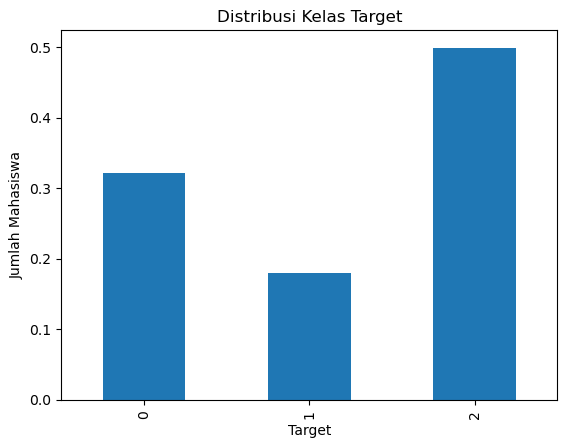

In [6]:
#Cek distribusi Target
data['Target'].value_counts(normalize=True).sort_index().plot(
    kind='bar'
)
plt.xlabel('Target')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Distribusi Kelas Target')
plt.show()

In [7]:
#Cek missing value
round(data.isnull().sum()/data.shape[0]*100, 2)

Marital status                                    0.0
Application order                                 0.0
Daytime/evening attendance\t                      0.0
Previous qualification (grade)                    0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age at enrollment                                 0.0
International                                     0.0
Curricular units 1st sem (credited)               0.0
Curricular units 1st sem (enrolled)               0.0
Curricular units 1st sem (evaluations)            0.0
Curricular units 1st sem (approved)               0.0
Curricular units 1st sem (grade)                  0.0
Curricular units 1st sem (wi

C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


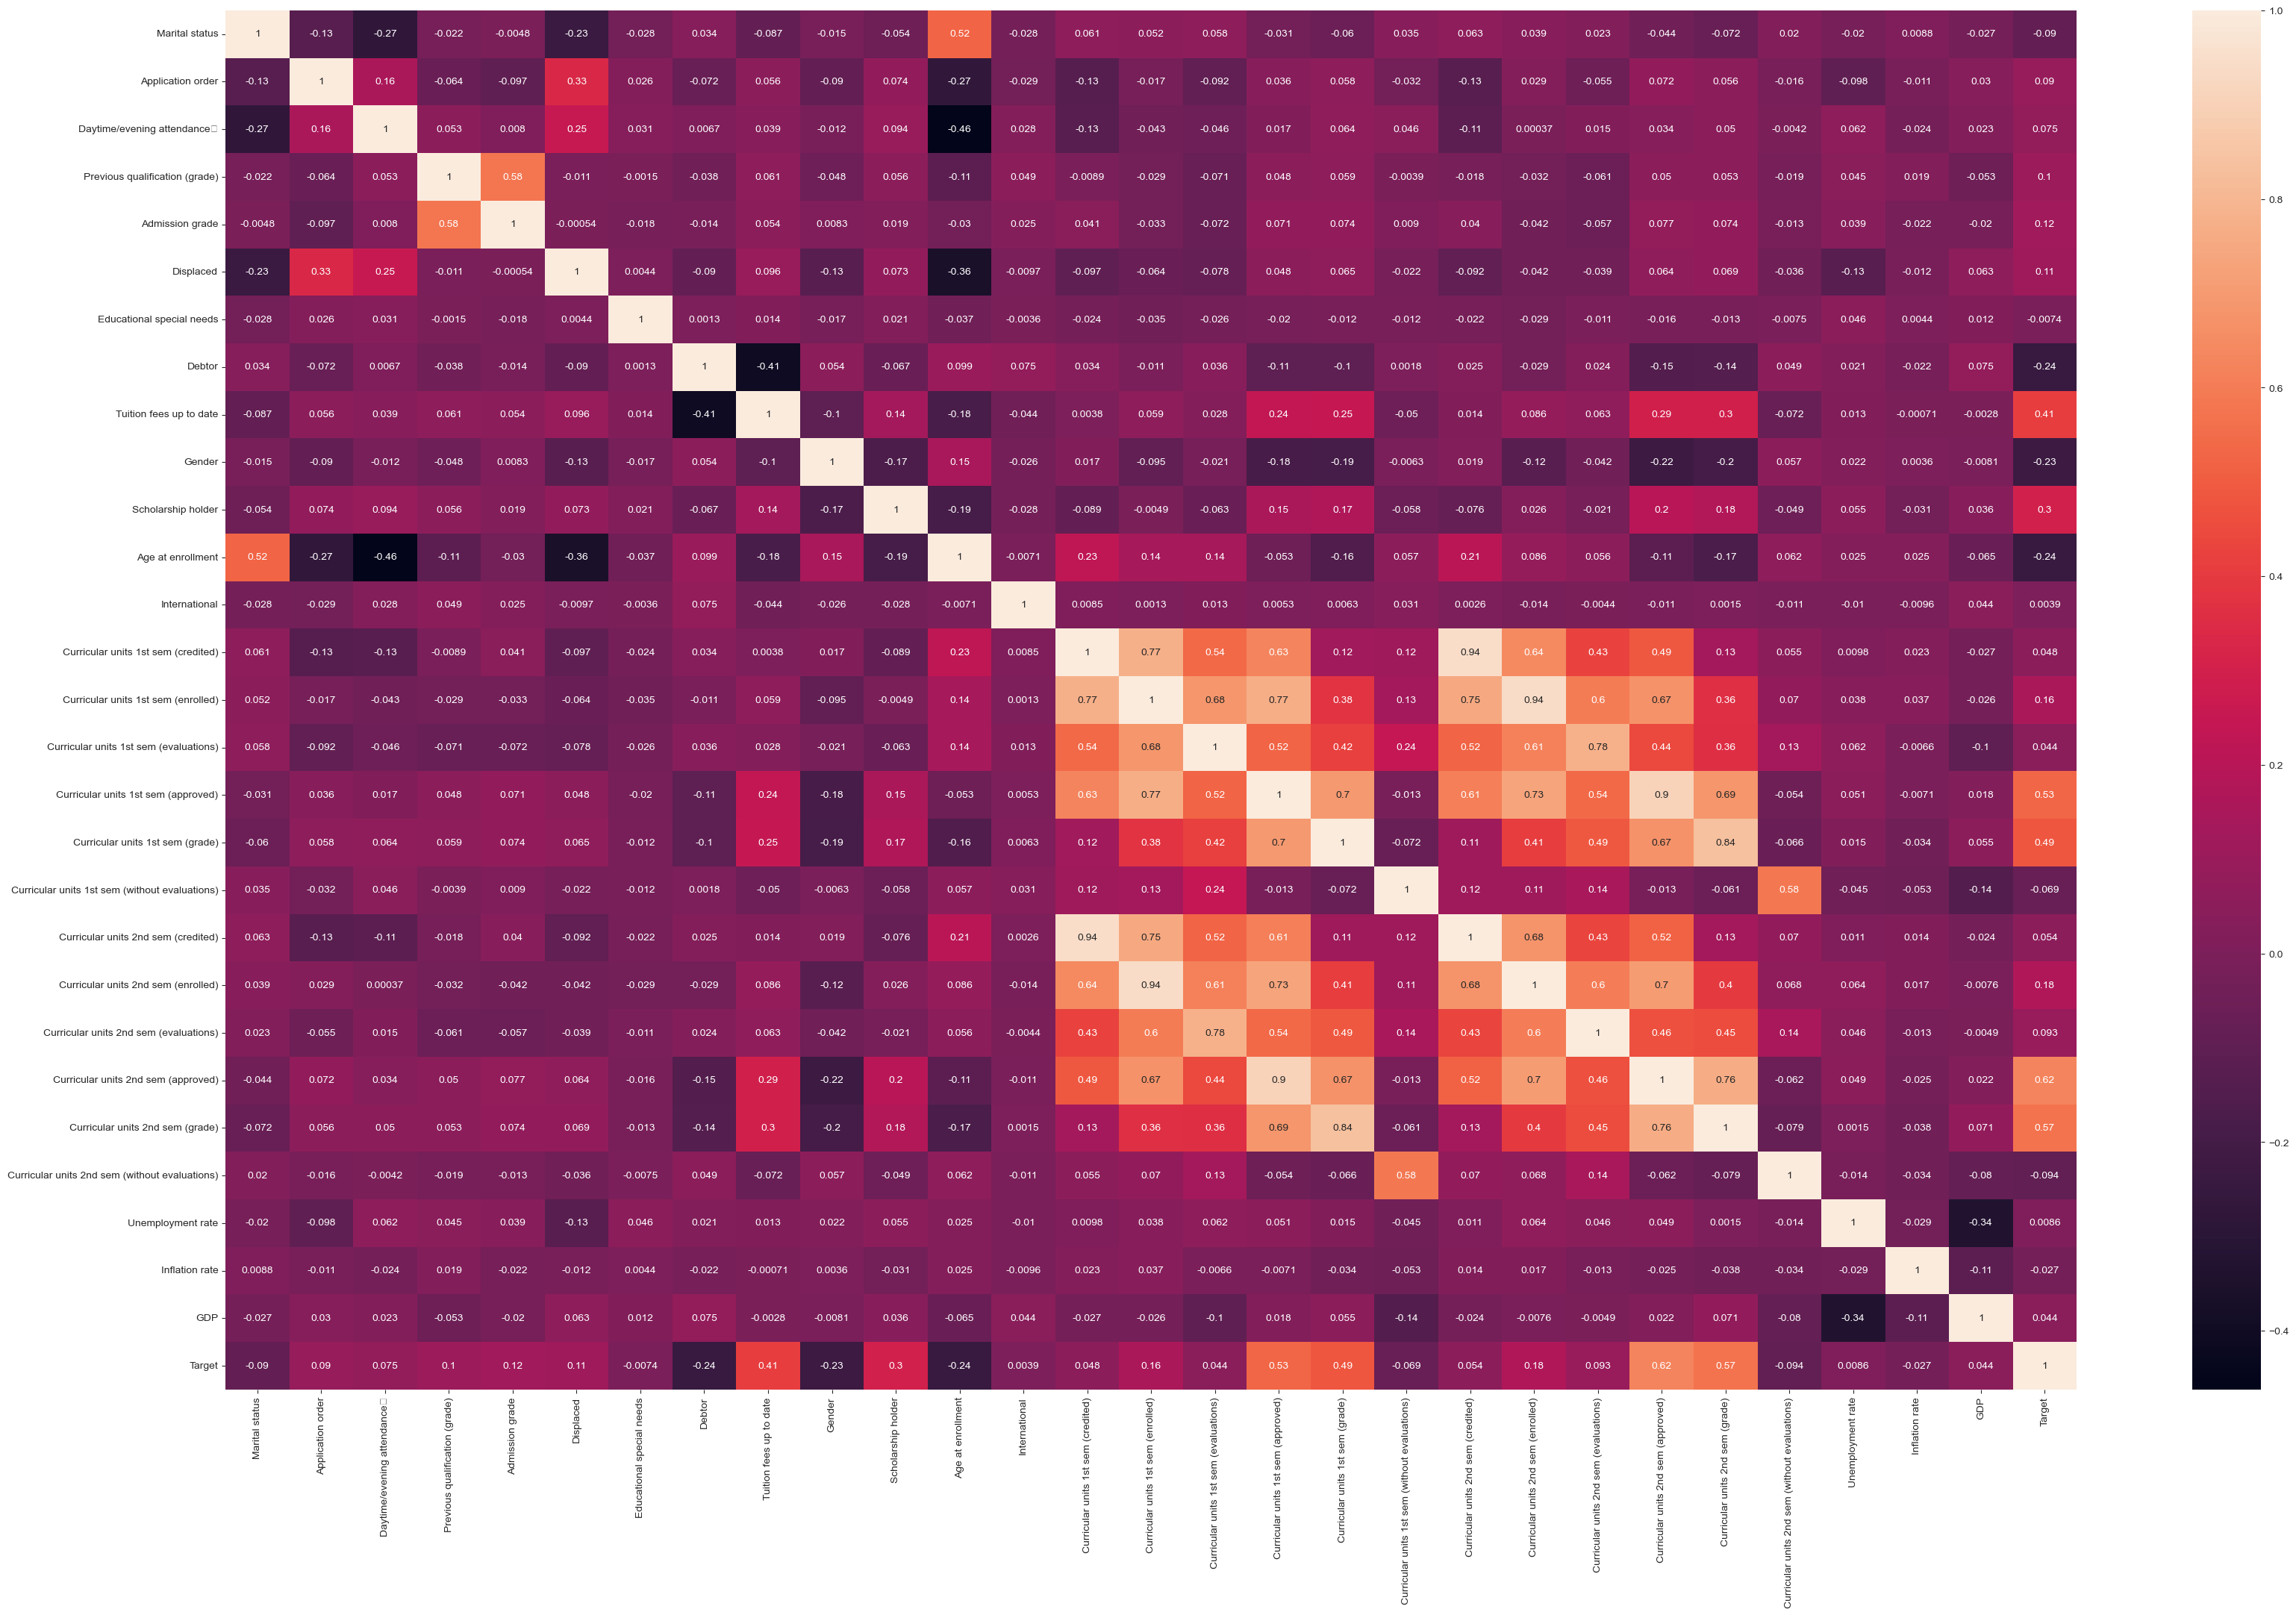

In [8]:
#Cek korelasi
corr_data = data.corr()
plt.figure(figsize=(40,24))
sns.set_style('ticks')

sns.heatmap(corr_data,annot=True)
plt.show()

In [9]:
#Cek jenis hubungan antara var Y dengan setiap var X
Y = 'Target'
corr_dataX = data.corr()[Y].drop(Y)
def hubungan(r):
    if r > 0:
        return 'Positif'
    elif r < 0:
        return 'Negatif'
    else:
        return 'Tidak ada hubungan'
result = pd.DataFrame({
    'Variabel_X': corr_dataX.index,
    'Jenis Hubungan': corr_dataX.apply(hubungan)
})
print(result)

                                                                                    Variabel_X  \
Marital status                                                                  Marital status   
Application order                                                            Application order   
Daytime/evening attendance\t                                      Daytime/evening attendance\t   
Previous qualification (grade)                                  Previous qualification (grade)   
Admission grade                                                                Admission grade   
Displaced                                                                            Displaced   
Educational special needs                                            Educational special needs   
Debtor                                                                                  Debtor   
Tuition fees up to date                                                Tuition fees up to date   
Gender              

In [10]:
#Variabel kategori
cat_cols=data.columns[[0,1,2,5,6,7,8,9,10,12,28]]
list(cat_cols)

['Marital status',
 'Application order',
 'Daytime/evening attendance\t',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target']

In [11]:
#Cek Outlier
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

In [12]:
for j in data.columns.drop(list(cat_cols)):
    Q1 = data[j].describe()['25%']
    Q3 = data[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(data[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(data[j]).split(',')))-1))
        print(find_outlier(data[j]))

Feature Previous qualification (grade) has 179 Outlier which is:
100.0, 167.0, 178.0, 99.0, 170.0, 100.0, 100.0, 170.0, 100.0, 188.0, 96.0, 170.0, 166.0, 96.0, 102.0, 101.0, 100.0, 100.0, 180.0, 172.0, 102.0, 170.0, 180.0, 100.0, 100.0, 170.0, 100.0, 100.0, 165.0, 190.0, 100.0, 100.0, 100.0, 164.0, 163.0, 100.0, 100.0, 170.0, 100.0, 163.0, 165.0, 102.0, 100.0, 175.0, 163.0, 170.0, 100.0, 176.0, 100.0, 170.0, 100.0, 168.0, 168.0, 101.0, 170.0, 170.0, 180.0, 100.0, 100.0, 97.0, 100.0, 172.0, 164.0, 101.0, 100.0, 164.0, 100.0, 168.0, 100.0, 170.0, 164.0, 100.0, 170.0, 184.4, 100.0, 100.0, 100.0, 100.0, 174.0, 170.0, 182.0, 167.0, 180.0, 170.0, 99.0, 178.0, 100.0, 100.0, 170.0, 100.0, 95.0, 100.0, 100.0, 100.0, 100.0, 172.0, 170.0, 100.0, 100.0, 170.0, 166.0, 100.0, 100.0, 190.0, 163.3, 100.0, 163.0, 165.0, 172.0, 100.0, 100.0, 100.0, 101.0, 100.0, 170.0, 100.0, 168.0, 100.0, 100.0, 164.0, 163.0, 170.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 172.0, 169.0, 100.0, 100.0, 180.0, 177.0, 165

Feature Curricular units 1st sem (without evaluations) has 294 Outlier which is:
1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 4, 2, 1, 3, 2, 1, 1, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 6, 1, 3, 1, 4, 1, 1, 1, 3, 2, 4, 1, 12, 2, 1, 2, 2, 1, 4, 3, 10, 2, 2, 4, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 4, 2, 7, 1, 2, 5, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 8, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 2, 6, 1, 8, 1, 2, 2, 2, 4, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 8, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 3, 1, 7, 1, 2, 1, 4, 7, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 1, 6, 1, 3, 3, 2, 1, 6, 3, 1, 1, 1, 1, 1, 1, 3, 7, 4, 1, 7, 1, 5, 1, 2, 3, 2, 1, 2, 1, 3, 2, 3, 1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 3, 1, 2, 5, 1, 8, 1, 5, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 12, 1, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 4, 1, 1, 1, 1, 6, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 6, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 4, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 
Feature Curricular units 2nd sem 

Feature Unemployment rate has no Outlier
Feature Inflation rate has no Outlier
Feature GDP has no Outlier


In [13]:
#Scaling
num_cols = data.columns.difference(cat_cols)
#Robust
data_num_robust = pd.DataFrame(
    RobustScaler().fit_transform(data[num_cols]),
    columns=num_cols,
    index=data.index
)
#Minmax
data_num_minmax = pd.DataFrame(
    MinMaxScaler().fit_transform(data[num_cols]),
    columns=num_cols,
    index=data.index
)
#Standard
data_num_standard = pd.DataFrame(
    StandardScaler().fit_transform(data[num_cols]),
    columns=num_cols,
    index=data.index
)

In [14]:
ori_cols = data.columns

In [15]:
data_robust = pd.concat(
    [
        data.drop(columns=num_cols),
        data_num_robust              
    ],
    axis=1
)
data_robust = data_robust[ori_cols]
data_robust

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,-0.740000,0.071006,1,0,0,1,1,...,0.0,-3.0,-2.00,-1.25,-4.722581,0.0,-0.066667,0.000000,0.406877,0
1,1,1,1,1.793333,0.970414,1,0,0,0,1,...,0.0,0.0,-0.50,0.25,0.567742,0.0,0.622222,-0.739130,0.134670,2
2,1,5,1,-0.740000,-0.076923,1,0,0,0,1,...,0.0,0.0,-2.00,-1.25,-4.722581,0.0,-0.066667,0.000000,0.406877,0
3,1,2,1,-0.740000,-0.384615,1,0,0,1,0,...,0.0,0.0,0.50,0.00,0.077419,0.0,-0.377778,-0.956522,-0.985673,2
4,2,1,0,-2.206667,0.911243,0,0,0,1,0,...,0.0,0.0,-0.50,0.25,0.309677,0.0,0.622222,-0.739130,0.134670,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,-0.540000,-0.230769,0,0,0,1,1,...,0.0,0.0,0.00,0.00,0.180645,0.0,0.977778,0.608696,-1.255014,2
4420,1,2,1,-0.873333,-0.420118,1,0,1,0,0,...,0.0,0.0,-0.50,-0.75,-0.464516,0.0,0.000000,-0.347826,0.487106,0
4421,1,1,1,1.393333,1.384615,1,0,0,1,0,...,0.0,1.0,0.25,-1.00,0.503226,0.0,0.622222,-0.739130,0.134670,0
4422,1,1,1,3.126667,1.639053,1,0,0,1,0,...,0.0,-0.5,-0.50,0.00,-0.077419,0.0,-0.377778,-0.956522,-0.985673,2


In [16]:
data_minmax = pd.concat(
    [
        data.drop(columns=num_cols), 
        data_num_minmax      
    ],
    axis=1
)
data_minmax = data_minmax[ori_cols]
data_minmax

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,0.284211,0.340000,1,0,0,1,1,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
1,1,1,1,0.684211,0.500000,1,0,0,0,1,...,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,2
2,1,5,1,0.284211,0.313684,1,0,0,0,1,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
3,1,2,1,0.284211,0.258947,1,0,0,1,0,...,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,2
4,2,1,0,0.052632,0.489474,0,0,0,1,0,...,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,0.315789,0.286316,0,0,0,1,1,...,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,2
4420,1,2,1,0.263158,0.252632,1,0,1,0,0,...,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,0
4421,1,1,1,0.621053,0.573684,1,0,0,1,0,...,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,0
4422,1,1,1,0.894737,0.618947,1,0,0,1,0,...,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,2


In [17]:
data_standard = pd.concat(
    [
        data.drop(columns=num_cols),  
        data_num_standard               
    ],
    axis=1
)
data_standard = data_standard[ori_cols]
data_standard

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,-0.804841,0.022229,1,0,0,1,1,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,1,1,1,2.076819,1.071926,1,0,0,0,1,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,1,5,1,-0.804841,-0.150419,1,0,0,0,1,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,1,2,1,-0.804841,-0.509526,1,0,0,1,0,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,2,1,0,-2.473171,1.002867,0,0,0,1,0,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,-0.577342,-0.329972,0,0,0,1,1,...,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,2
4420,1,2,1,-0.956508,-0.550961,1,0,1,0,0,...,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,0
4421,1,1,1,1.621820,1.555339,1,0,0,1,0,...,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,0
4422,1,1,1,3.593483,1.852293,1,0,0,1,0,...,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,2


# Modelling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 

In [19]:
#Skenario Pembagian Data
split_ratios = {
    '80:20': 0.2,
    '90:10': 0.1
}

In [20]:
#Model
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(metric='manhattan'),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(max_iter=1000)
}

In [21]:
def run_experiment(data_scaled, target_col, dataset_name):
    X = data_scaled.drop(columns=target_col)
    y = data_scaled[target_col]
    results = []
    for split_name, test_size in split_ratios.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            random_state=42,
            stratify=y
        )
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            results.append({
                'Dataset': dataset_name,
                'Split': split_name,
                'Model': model_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall_DO': recall_score(y_test, y_pred, labels=[0], average=None)[0],
                'Precision_DO': precision_score(y_test, y_pred, labels=[0], average=None)[0],
                'F1_Macro': f1_score(y_test, y_pred, average='macro')
            })
    return pd.DataFrame(results)

In [22]:
results_robust = run_experiment(
    data_scaled=data_robust,
    target_col='Target',
    dataset_name='Robust'
)

results_minmax = run_experiment(
    data_scaled=data_minmax,
    target_col='Target',
    dataset_name='MinMax'
)

results_standard = run_experiment(
    data_scaled=data_standard,
    target_col='Target',
    dataset_name='Standard'
)

C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\sklearn\svm\_base.py:305: Conve

In [23]:
#Evaluasi Model
final_results = pd.concat(
    [results_robust, results_minmax, results_standard],
    ignore_index=True
)
final_results

,Dataset,Split,Model,Accuracy,Recall_DO,Precision_DO,F1_Macro
0,Robust,80:20,LogisticRegression,0.771751,0.774648,0.802920,0.686778
1,Robust,80:20,KNN,0.725424,0.676056,0.761905,0.641891
2,Robust,80:20,DecisionTree,0.653107,0.661972,0.678700,0.590577
3,Robust,80:20,RandomForest,0.767232,0.760563,0.805970,0.687185
4,Robust,80:20,SVM,0.762712,0.686620,0.855263,0.686461
5,Robust,90:10,LogisticRegression,0.799097,0.816901,0.852941,0.727114
6,Robust,90:10,KNN,0.735892,0.697183,0.798387,0.661216
7,Robust,90:10,DecisionTree,0.661400,0.676056,0.716418,0.588029
8,Robust,90:10,RandomForest,0.787810,0.802817,0.850746,0.711230
9,Robust,90:10,SVM,0.769752,0.683099,0.873874,0.693884


berdasarkan nilai Recall_DO dan Accuracy tertinggi, maka model terbaik adalah random forest dengan skenario 90:10 tanpa ada perbedaan antar jenis scaling

# Feature Importance

In [24]:
X = data_standard.drop(columns=['Target'])
y = data_standard['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 

In [25]:
bestmodel = RandomForestClassifier(random_state=42)
bestmodel.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Skor': bestmodel.feature_importances_
}).sort_values(by='Importance Skor', ascending=False)
print(feature_importance)

                                           Feature  Importance Skor
22             Curricular units 2nd sem (approved)         0.155712
23                Curricular units 2nd sem (grade)         0.110493
16             Curricular units 1st sem (approved)         0.108888
17                Curricular units 1st sem (grade)         0.072894
4                                  Admission grade         0.061577
3                   Previous qualification (grade)         0.052907
11                               Age at enrollment         0.049651
21          Curricular units 2nd sem (evaluations)         0.046300
15          Curricular units 1st sem (evaluations)         0.042422
8                          Tuition fees up to date         0.038196
27                                             GDP         0.030494
20             Curricular units 2nd sem (enrolled)         0.027818
25                               Unemployment rate         0.027804
26                                  Inflation ra

C:\Users\Nadia Salsabila\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


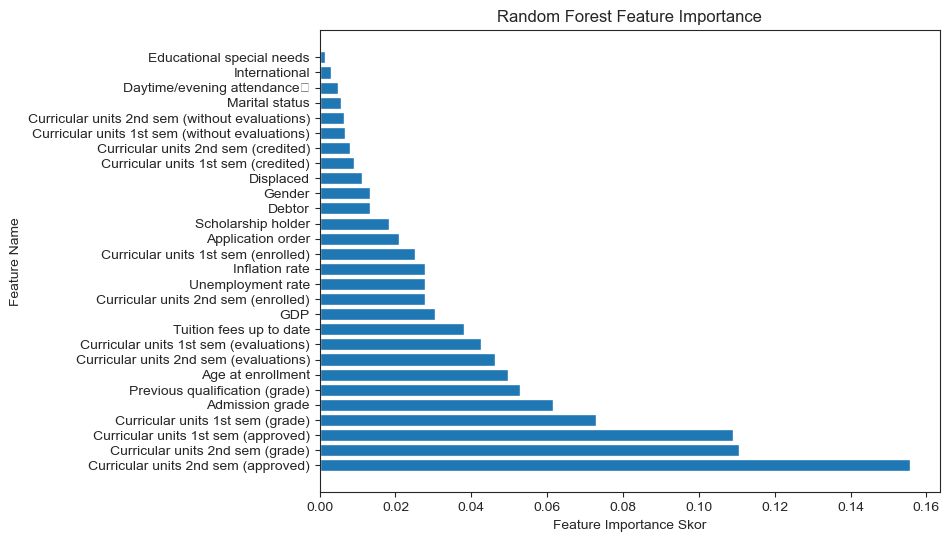

In [26]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance Skor'])
plt.xlabel('Feature Importance Skor')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.show()

terlihat bahwa variabel paling penting yang mempengaruhi adalah Curricular units 2nd sem (approved)